<a href="https://colab.research.google.com/github/agnel-kf/Power_plant_energy_pred/blob/main/Combined_Power_Plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
tf.__version__

'2.5.0'

In [60]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')

### Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

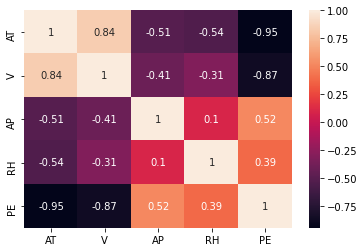

In [61]:
df_corr = dataset.corr()
sns.heatmap(df_corr,annot = True)

In [62]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
y = y.reshape(len(y),1)

In [63]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size = 0.25,random_state = 0)

# Building the ANN
## Initialising the ANN

In [65]:
ann = tf.keras.models.Sequential()

## Adding the hidden layer

In [66]:
ann.add(tf.keras.layers.Dense(units = 6,activation = 'relu'))

## Adding the second hidden layer

In [67]:
ann.add(tf.keras.layers.Dense(units = 6,activation = 'relu'))

## Adding the output layer

In [68]:
ann.add(tf.keras.layers.Dense(units = 1))

# Compiling the model

In [69]:
ann.compile(optimizer ='adam',loss = 'mean_squared_error')

# Training the model

In [70]:
ann.fit(train_X,train_y,batch_size = 32,epochs = 100)

Epoch 1/100
225/225 [==============================] - 1s 1ms/step - loss: 2628.0374
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 194.9161
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 152.8845
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 114.7133
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 87.8007
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 71.8405
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 62.4168
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 56.7580
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 52.8982
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 48.8636
Epoch 11/100
225/225 [==============================] - 0s 1ms/step - loss: 45.7360
Epoch 12/100
225/225 [==============================] - 0s 1ms/step - loss: 43.3

# Predicting the Test set

In [72]:
y_preds = ann.predict(val_X)
np.set_printoptions(precision = 2)
print(np.concatenate((y_preds.reshape(len(y_preds),1), val_y.reshape(len(val_y),1)),1))


[[434.23 431.23]
 [461.57 460.01]
 [465.87 461.14]
 ...
 [471.85 468.9 ]
 [476.6  473.9 ]
 [438.05 437.07]]


# Evaluating the model

In [74]:
from sklearn.metrics import r2_score
r2_score(val_y,y_preds)

0.9227042669375591